In [2]:
# data processing packages
import numpy as np   
import pandas as pd 
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

import random

# local packages 
from utils_causal import *

In [ ]:
# TO DO
# 
# Kalman 
# structural bayeisan time series
# feature extration on time series


In [3]:
file_dic_ml = {}
    
file_addr = ["../../dataset/dataset_ts/air_xtrain.dat", \
                 "../../dataset/dataset_ts/air_xtest.dat",\
                 "../../dataset/dataset_ts/air_ytrain.dat", \
                 "../../dataset/dataset_ts/air_ytest.dat"]
file_dic_ml.update( {"air": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/energy_xtrain.dat", \
                 "../../dataset/dataset_ts/energy_xtest.dat",\
                 "../../dataset/dataset_ts/energy_ytrain.dat", \
                 "../../dataset/dataset_ts/energy_ytest.dat"]
file_dic_ml.update( {"energy": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/pm25_xtrain.dat", \
                 "../../dataset/dataset_ts/pm25_xtest.dat",\
                 "../../dataset/dataset_ts/pm25_ytrain.dat", \
                 "../../dataset/dataset_ts/pm25_ytest.dat"]
file_dic_ml.update( {"pm25": file_addr} )



file_dic_statis = {}
    
file_addr = ["../../dataset/dataset_ts/air_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/air_xtest_statis.dat"]
file_dic_statis.update( {"air": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/energy_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/energy_xtest_statis.dat"]
file_dic_statis.update( {"energy": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/pm25_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/pm25_xtest_statis.dat"]
file_dic_statis.update( {"pm25": file_addr} )

file_addr = ["../../dataset/dataset_ts/plant_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/plant_xtest_statis.dat"]
file_dic_statis.update( {"plant": file_addr} )

In [35]:
# PLANT : errors 

file_path = "../../ts_results/plant_mv_att_sigmoid.txt"

dta_df = pd.read_csv( file_path, sep=',', names = ['loss', 'tr', 'ts', 'mae', 'mape'], header = 0 )
print dta_df.iloc[0]

rmse_ts = [float(tmp[6:]) for tmp in dta_df['ts'] ]
print rmse_ts[:2] 

mae_ts = [float(tmp) for tmp in dta_df['mae'] ]
print mae_ts[:2] 

sort_rmse_ts = sorted(rmse_ts)
print 'RMSE ', sort_rmse_ts[:2]

sort_mae_ts = sorted(mae_ts)
print 'MAE ', sort_mae_ts[:2]

loss    At epoch 1: loss 45025.741127
tr                   train 211.859861
ts                    test 172.063171
mae                           158.137
mape                      8.33566e+06
Name: 0, dtype: object
[172.063171, 160.763382]
[158.137329, 130.605301]
RMSE  [158.494614, 159.375519]
MAE  [104.112511, 106.09479499999999]


In [33]:
# ENERGY : errors 

file_path = "../../ts_results/energy_mv_att_0.60.001.txt"

dta_df = pd.read_csv( file_path, sep=',', names = ['loss', 'tr', 'ts', 'mae', 'mape'], header = 0 )
print dta_df.iloc[0]

rmse_ts = [float(tmp[6:]) for tmp in dta_df['ts'] ]
print rmse_ts[:2] 

mae_ts = [float(tmp) for tmp in dta_df['mae'] ]
print mae_ts[:2] 

sort_rmse_ts = sorted(rmse_ts)
print sort_rmse_ts[:2]

sort_mae_ts = sorted(mae_ts)
print sort_mae_ts[:2]

loss    At epoch 1: loss 0.209599
tr                 train 0.453499
ts                  test 0.412334
mae                      0.296545
mape                     0.069455
Name: 0, dtype: object
[0.412334, 0.379956]
[0.296545, 0.25613400000000003]
[0.367744, 0.36945]
[0.24655300000000002, 0.24832100000000001]


In [18]:
# ENERGY : attention

num_ex_vari = 13

py_ts = np.load("../../ts_results/energy_mv_att6.dat")
print np.shape(py_ts)

cols = ['truth', 'pred'] + [str(i) for i in range(num_ex_vari)]
att_cols = [str(i) for i in range(num_ex_vari)]
print np.shape(py_ts)
py_df = pd.DataFrame( py_ts, columns = cols)

print py_df[['truth','pred']].iloc[:3]
print py_df[att_cols].iloc[:3]


# # variate attention distribution
# for i in att_cols:
    
#     tmp = py_df[i]
#     fig, ax = plt.subplots()
#     ax.hist(tmp, density = True)
#     ax.set_xlim(0, 0.5)
#     ax.set_ylim(0, 200)
#     ax.set_title('variable ' + str(i))

(2000, 15)
(2000, 15)
      truth      pred
0  3.912023  4.053327
1  3.688880  3.928753
2  3.688880  3.760433
          0         1         2         3         4         5         6  \
0  0.300542  0.029839  0.047736  0.005728  0.176001  0.002170  0.006832   
1  0.296877  0.027954  0.046338  0.005670  0.188954  0.002144  0.006730   
2  0.291300  0.025863  0.045090  0.005537  0.207343  0.002113  0.006482   

          7         8         9        10        11        12  
0  0.002576  0.404001  0.010710  0.006712  0.001109  0.006045  
1  0.002548  0.398404  0.010600  0.006686  0.001099  0.005996  
2  0.002504  0.389785  0.010407  0.006590  0.001100  0.005885  


In [20]:
# PM25 : errors 

file_path = "../../ts_results/pm_mv_0.60.001.txt"

dta_df = pd.read_csv( file_path, sep=',', names = ['loss', 'tr', 'ts', 'mae', 'mape'], header = 0 )
print dta_df.iloc[0]

rmse_ts = [float(tmp[6:]) for tmp in dta_df['ts'] ]
print rmse_ts[:2] 

mae_ts = [float(tmp) for tmp in dta_df['mae'] ]
print mae_ts[:2] 

sort_rmse_ts = sorted(rmse_ts)
print 'RMSE ', sort_rmse_ts[:2]

sort_mae_ts = sorted(mae_ts)
print 'MAE ', sort_mae_ts[:2]

loss    At epoch 1: loss 0.133646
tr                 train 0.362250
ts                  test 0.425036
mae                       0.31097
mape                     0.099776
Name: 0, dtype: object
[0.425036, 0.432375]
[0.31096999999999997, 0.314021]
[0.337662, 0.339334]
[0.223595, 0.224832]


(2000, 9)
(2000, 9)
      truth      pred
0  4.248495  4.058376
1  4.290460  4.242391
2  4.343806  4.247853
          0         1         2         3         4         5         6
0  0.443736  0.086686  0.164143  0.139480  0.015177  0.091475  0.059302
1  0.448109  0.086966  0.163548  0.143059  0.014821  0.089689  0.053807
2  0.450870  0.085471  0.163621  0.142187  0.014420  0.090804  0.052626


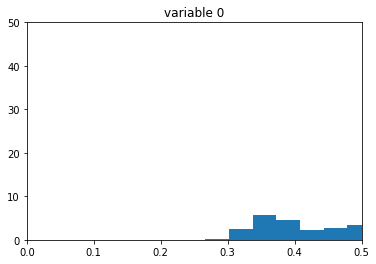

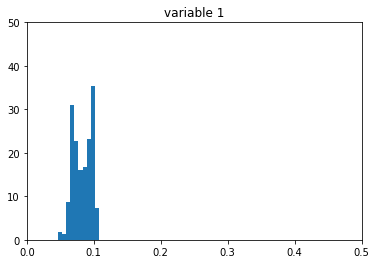

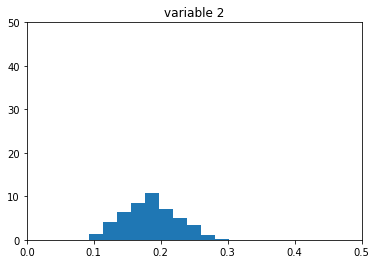

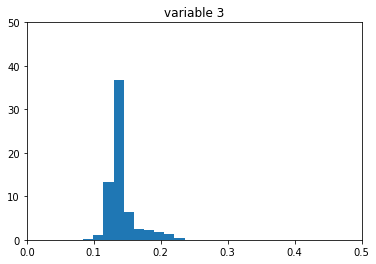

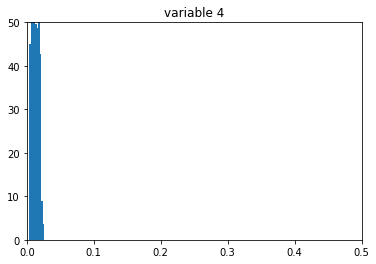

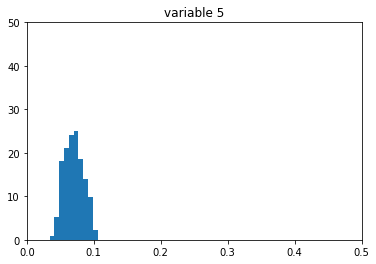

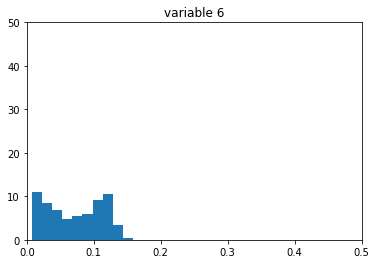

In [32]:
# PM25 : attention

num_ex_vari = 7

py_ts = np.load("../../ts_results/pm_mv_1.dat")
print np.shape(py_ts)

cols = ['truth', 'pred'] + [str(i) for i in range(num_ex_vari)]
att_cols = [str(i) for i in range(num_ex_vari)]
print np.shape(py_ts)
py_df = pd.DataFrame( py_ts, columns = cols)

print py_df[['truth','pred']].iloc[:3]
print py_df[att_cols].iloc[:3]


# variate attention distribution
for i in att_cols:
    
    tmp = py_df[i]
    fig, ax = plt.subplots()
    ax.hist(tmp, density = True)
    ax.set_xlim(0, 0.5)
    ax.set_ylim(0, 50)
    ax.set_title('variable ' + str(i))

In [7]:
# load data for statistical analysis

# feature_cols = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']

# DEWP: Dew Point (â„ƒ) 
# TEMP: Temperature (â„ƒ) 
# PRES: Pressure (hPa) 
# cbwd: Combined wind direction 
# Iws: Cumulated wind speed (m/s) 
# Is: Cumulated hours of snow 
# Ir: Cumulated hours of rain 

# the last column is the targe variable 
dataset_str = 'pm25'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)


# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 6)

#print causality_pairwise(VAR_res, post_ts)

(8200, 7) (2200, 7)
stationary prepro:  1 2.96860450558e-30 

stationary prepro:  1 0.0 

stationary prepro:  0 0.000446514960092 

stationary prepro:  0 3.06364332043e-25 

stationary prepro:  0 0.0 

stationary prepro:  0 8.02285016073e-29 

stationary prepro:  0 2.17604493132e-20 

(8199, 7)
best lag:  {'fpe': 25, 'hqic': 15, 'bic': 3, 'aic': 25}
[0, 1, 2]


In [8]:
# load data for statistical analysis

# feature_cols = [ 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9' , 'T_out', 'Windspeed', 'RH_out', 'Tdewpoint' 


# the last column is the targe variable 
dataset_str = 'energy'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)

# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 13)

#print causality_pairwise(VAR_res, post_ts)

(8200, 14) (2200, 14)
stationary prepro:  0 1.53873681466e-08 

stationary prepro:  0 2.67332352376e-10 

stationary prepro:  0 6.22084629443e-06 

stationary prepro:  0 7.65852979756e-08 

stationary prepro:  0 4.56317841218e-09 

stationary prepro:  0 3.12028393606e-05 

stationary prepro:  0 0.00215212148204 

stationary prepro:  0 0.000159225901517 

stationary prepro:  1 0.0 

stationary prepro:  0 8.14779094622e-05 

stationary prepro:  0 8.95657918297e-07 

stationary prepro:  0 9.36092515117e-17 

stationary prepro:  0 0.00688669851617 

stationary prepro:  0 4.24157747612e-26 

(8199, 14)
best lag:  {'fpe': 26, 'hqic': 14, 'bic': 8, 'aic': 26}
[1, 8]


In [9]:
# load data for statistical analysis

# feature_cols = ['p-temperature', 'cloudcover', 'dewpoint', 'humidity', 'temperature', 'windbearing', 'windspeed']


# the last column is the targe variable 
dataset_str = 'plant'
xtr = np.load(file_dic_statis[dataset_str][0])
xts = np.load(file_dic_statis[dataset_str][1])
print np.shape(xtr), np.shape(xts)

# stationarize time series 
sta_dta = multi_ts_stationarize( np.asarray(xtr) )
print np.shape(sta_dta)

# variable dependency
max_order = 200
VAR_res,lag = causality_VAR(sta_dta, max_order)
            
print causality_one(VAR_res, sta_dta, 7)

#print causality_pairwise(VAR_res, post_ts)

(5400, 8) (1554, 8)
stationary prepro:  1 3.89605902543e-30 

stationary prepro:  0 5.8135957626e-09 

stationary prepro:  0 0.00897549257369 

stationary prepro:  0 5.50436184832e-05 

stationary prepro:  1 0.0 

stationary prepro:  0 9.23194064666e-19 

stationary prepro:  0 2.9333505289e-20 

stationary prepro:  0 8.96960810192e-09 

(5399, 8)
best lag:  {'fpe': 39, 'hqic': 20, 'bic': 19, 'aic': 39}
[0, 1, 2, 4]


In [ ]:
# statisical test 
trans_dta = np.transpose(xtr, [1,0])
for i in range(np.shape(xtr)[1]):
    print '--', i, stationary_test( trans_dta[i] )

In [ ]:
# temporal dependency

temporal_detect_individual(6, xtr, 200)

# auto-correlation, partial auto-correlation, cross correlation 
